# ML technique 



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

import time

In [ ]:
# or upload on Google Drive and mount your drive (faster than 'files')
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Preliminaries 

In [ ]:
train_raw = pd.read_csv("/content/drive/My Drive/Data science /train_set.csv")
test_raw = pd.read_csv("/content/drive/My Drive/Data science /test_set.csv")

In [ ]:
#Delete first column
train_raw=train_raw.drop(train_raw.columns[0],axis=1)
test_raw=test_raw.drop(test_raw.columns[0],axis=1)
train_raw.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,low,med,3,4,small,high,good
1,vhigh,vhigh,2,2,small,low,good
2,med,med,5more,4,med,high,good
3,low,med,3,4,small,high,unacc
4,vhigh,vhigh,2,2,small,low,unacc


In [ ]:
from sklearn.preprocessing import LabelEncoder 
#Turn categorical data to numeric value for computing 
Train=train_raw.apply(LabelEncoder().fit_transform)
Test=test_raw.apply(LabelEncoder().fit_transform)

Train.head()

,buying,maint,doors,persons,lug_boot,safety,rating
0,1,2,1,1,2,0,1
1,3,3,0,0,2,1,1
2,2,2,3,1,1,0,1
3,1,2,1,1,2,0,2
4,3,3,0,0,2,1,2


In [ ]:
from sklearn.utils import shuffle
#Balance the train data
# class count
count_0, count_1, count_2, count_3 = Train.rating.value_counts()

# Divide by class
df_0 = Train[Train['rating'] == 0]
df_1 = Train[Train['rating'] == 1]
df_2 = Train[Train['rating'] == 2]
df_3 = Train[Train['rating'] == 3]
# bootstrapping
df_0_over = df_0.sample(count_1, replace=True,random_state=11).reset_index().drop(columns=['index'])
df_1_over = df_1.sample(count_1, replace=True,random_state=11).reset_index().drop(columns=['index'])
df_2_over = df_2.sample(count_1, replace=True,random_state=11).reset_index().drop(columns=['index'])
df_3_over = df_3.sample(count_1, replace=True,random_state=11).reset_index().drop(columns=['index'])
# concatenating all classes again
data_over = pd.concat([df_0_over, df_1_over, df_2_over, df_3_over])
X_train=data_over.loc[:,data_over.columns != 'rating'].reset_index().drop(columns=['index'])
Y_train=data_over['rating'].reset_index().drop(columns=['index'])
X_test=Test.loc[:,Test.columns != 'rating']
Y_test=Test['rating']

#Label for Neural Network
Y_train_N=list(data_over.rating)
Y_test_N=list(Test.rating)

In [ ]:
 from sklearn.preprocessing import StandardScaler

 #Standardize the descriptors

 scaler = StandardScaler()
 scaler.fit(X_train)
 Descriptor1=scaler.fit_transform(X_train)
 scaler.fit(X_test)
 Descriptor2=scaler.fit_transform(X_test)

 #Substitue back the standardized value
 X_train.loc[:]=Descriptor1
 X_test.loc[:]=Descriptor2
 X_train

,buying,maint,doors,persons,lug_boot,safety
0,0.377143,-0.403569,-0.558991,-0.416616,-1.111227,1.356696
1,-1.747297,0.625739,-1.493055,-0.416616,-1.111227,-0.862946
2,0.377143,1.655047,-0.558991,-0.416616,0.184027,-0.862946
3,0.377143,-1.432877,-1.493055,1.002240,-1.111227,-0.862946
4,0.377143,0.625739,0.375074,-0.416616,-1.111227,-0.862946
...,...,...,...,...,...,...
3479,-0.685077,-0.403569,-0.558991,-0.416616,-1.111227,1.356696
3480,0.377143,-0.403569,0.375074,-0.416616,0.184027,1.356696
3481,1.439363,1.655047,-1.493055,-0.416616,0.184027,0.246875
3482,0.377143,-0.403569,-0.558991,1.002240,0.184027,-0.862946


# TASK 1  Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from pprint import pprint

# Look at parameters in random forest
pprint(rf.get_params())


{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}




---

## Introduction:
We can choose the range for number of trees to be 1-100, the 
Maximum of features at split to be 1-6 which is the largest possible since we have only 6 influencing factor and maximum level of trees to be 1-20 since the optimal is always within three times the number of feature in general. Then we will use the built-in cross validation function to compute the average accuracy score of 5-fold and plot it to get the optimal value.



---



computation time for random forest: 69.64142855


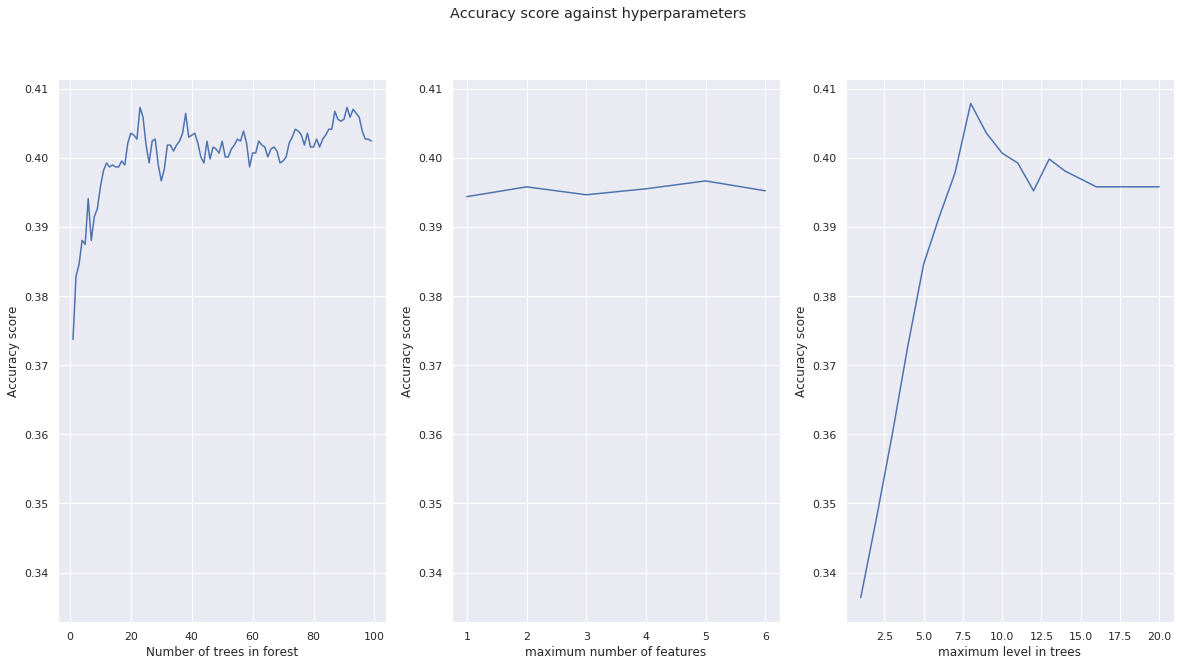

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
#Import stratifiedKfold 
from sklearn.model_selection import StratifiedKFold
start= time.process_time() 
#Set to stratifed 5 fold method
cv = StratifiedKFold(n_splits=5, random_state=42)

#Iterating one hyperparameter while keep other the same and plot the accuracy score.

#Plot for number of trees
accuracy=[]
for i in range(1,100):
  base_model=RandomForestClassifier(n_estimators = i,random_state=11)
  #Use cross validation score from sklearn and set to stratified 5 fold.  
  scores = cross_val_score(base_model, X_train, Y_train, cv=cv)
  accuracy.append(scores.mean())  

x=np.linspace(1,i,len(accuracy))
sns.set(style="darkgrid")
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(131)
#Set accuracy score to be the average of 5fold

ax1=sns.lineplot(x,accuracy)
ax1.set_xlabel('Number of trees in forest')
ax1.set_ylabel('Accuracy score')
fig.suptitle('Accuracy score against hyperparameters')

#Plot for maximum number of features
accuracy=[]
for i in range(1,6+1):
  base_model=RandomForestClassifier(max_features = i,random_state=11)
  #Use cross validation score from sklearn and set to stratified 5 fold. 
  scores = cross_val_score(base_model, X_train, Y_train, cv=cv)
  accuracy.append(scores.mean()) 

x=np.linspace(1,i,len(accuracy))
sns.set(style="darkgrid")
ax2 = fig.add_subplot(132,sharey=ax1)
#Set accuracy score to be the average of 5fold
ax2=sns.lineplot(x,accuracy)
ax2.set_xlabel('maximum number of features')
ax2.set_ylabel('Accuracy score')


#Plot for maximum level in trees
accuracy=[]
for i in range(1,20+1):
  base_model=RandomForestClassifier(max_depth = i,random_state=11)
  #Use cross validation score from sklearn and set to stratified 5 fold. 
  scores = cross_val_score(base_model, X_train, Y_train, cv=cv)
  accuracy.append(scores.mean())  

x=np.linspace(1,i,len(accuracy))
ax3 = fig.add_subplot(133,sharey=ax1)
sns.set(style="darkgrid")
#Set accuracy score to be the average of 5fold
ax3=sns.lineplot(x,accuracy)
ax3.set_xlabel('maximum level in trees')
ax3.set_ylabel('Accuracy score')
rf_time=time.process_time() - start
print('computation time for random forest:',time.process_time() - start)



---


From the graph, my optimal hyperparameter choice would be Number of trees in forest is 37, maximum number of features is 2 and maximum level in trees is 8. By only varying one of the hyperparameters and keeping other the same, they are approximately where the accuracy score is highest. Note the random state is set as an integer to get reproducible result.


---




In [ ]:
rf_best_model=RandomForestClassifier(max_features = 2, n_estimators=37, max_depth=8,random_state = 11)
#Fit the data with all train data
rf_best_model.fit(X_train,Y_train)
  #Validate the model score using test 
print('Optimal hyperparameters accuracy score for train data:',rf_best_model.score(X_train,Y_train))

Optimal hyperparameters accuracy score for train data: 0.5189437428243399




---


By doing the above test, we see that the accuracy score has reached higher than optimizing one hyperparameters can get.

---

Number of trees in forest is just the number of example sets generated, although the perfomance gets better drastically by adding more trees at first , the performance will only vary in small range and does not become better much after certain amount.
 \\

---


Maximum number of feature is the number of parameter that are taken into consideration for the split rule. The more it take on, the model maybe overfitting as in our case. \\


---


Maximum level of feature is the number of spliting levels which stops at some criterion such as the spliting values are purely. The more levels take on, the model maybe overfitting so that the accuracy score decreases. \\


---


From the above graph, we identify the maximum level of feature is the most impacted hyperparameter for our model. Accuracy score varies the most if the level was not choosen carefully. For the number of trees in forest, it is obvious to choose more but it might not worth the computation time cost. The maximum number of feature should also be choosen carefully, but it only varies by 1% which is not as important as other two hyperparameters.


---




# TASK 2  Support Vector Machines 

In [ ]:
#Linear SVM's hyperparameter is C, the penalty parameter

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
C = [0.001, 0.01, 0.1, 1, 10]
param_grid = {'C': C}
grid_search = GridSearchCV(SVC(kernel='linear'), param_grid, cv=cv)
# Search on the train data
grid_search.fit(X_train,Y_train)
#Get the best parameter
print('Optimal Hyperparameter',grid_search.best_params_)
#Get the best accuracy 
print ('Optimal accuracy score',grid_search.best_score_)



Optimal Hyperparameter {'C': 0.001}
Optimal accuracy score 0.31142365097588975


In [ ]:
#Polynomial SVM's hyperparameter is C(the penalty parameter),degree and gamma(tolerance for trying to fit the data)

# Create the parameter grid based on the results of random search 
C = [0.001, 0.01, 0.1, 1, 10]
gamma = np.linspace(0.01,0.9,5)
degree=range(1,3)

param_grid = {'C': C, 'gamma' : gamma,'degree':degree}
grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=cv)
# Search on the train data
grid_search.fit(X_train,Y_train)
#Get the best parameter
print('Optimal Hyperparameter',grid_search.best_params_)
#Get the best accuracy 
print ('Optimal accuracy score',grid_search.best_score_)





Optimal Hyperparameter {'C': 0.1, 'degree': 2, 'gamma': 0.6775}
Optimal accuracy score 0.3412743972445465


In [ ]:
#RBF SVM's hyperparameter is C(the penalty parameter) and gamma(tolerance for trying to fit the data)
start = time.process_time()

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
C = [0.001, 0.01, 0.1, 1, 10]
gamma = np.linspace(0.01,0.9,10)
param_grid = {'C': C, 'gamma' : gamma}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=cv)
# Search on the train data
grid_search.fit(X_train,Y_train)
#Get the best parameter
print('Optimal Hyperparameter',grid_search.best_params_)
#Get the best accuracy 
print ('Optimal accuracy score',grid_search.best_score_)
SVM_rbf_time=time.process_time() - start
print('computation time for SVM rbf:',time.process_time() - start)

Optimal Hyperparameter {'C': 1, 'gamma': 0.9}
Optimal accuracy score 0.4084385763490241
computation time for SVM rbf: 128.43744266899998


In [ ]:
svm_base_model=SVC(kernel='rbf',random_state = 11)
#Fit the data with all train data
svm_base_model.fit(X_train,Y_train)
  #Validate the model score using train data
print('System default hyperparameters accuracy score for train data:',svm_base_model.score(X_train,Y_train))

System default hyperparameters accuracy score for train data: 0.45464982778415614


In [ ]:
svm_best_model=SVC(kernel='rbf',C=1,gamma=0.9,random_state = 11)
#Fit the data with all train data
svm_best_model.fit(X_train,Y_train)
  #Validate the model score using train data
print('Optimal hyperparameters accuracy score for train data:',svm_best_model.score(X_train,Y_train))

Optimal hyperparameters accuracy score for train data: 0.5548220436280138




---
C is the penalty parameter. It determines the tradeoff between a wide margin and classifier error. Large C means you are allowing little slack and the model will fit tighter to your dat therefore with lower bias and higher variance. Small C means you are allowing a lot of slack and the model will have more error on the training set, but be less sensitive to noise therefore with higher bias and low variance.

---
$\gamma$ is the inverse of the standard deviation of the RBF kernel, which is used as similarity measure between two points. SVM is trying to transform the dataset as they are in higher dimension, and gamma determines the boundary of which points are going to be transformed. The larger gamma gets, the more likely to be overfitting. So  small gamma leads to high variance and low bias ,  large gamma leads to higher bias and low variance. We will have to choose the right C and $\gamma$.


---



The SVM with best perfomance is using the rbf kernal as we can see it gives highest accuracy score for training set. And by choosing the right hyperparameter we can higher accuracy for using system default hyperparameter sets too.


# Task 3  Neural Networks

## Define hyperparameter


`input_size`: number of nodes in the input layer of the neural network;

`hidden_size`: number of neurons in each hidden layer;

`num_classes`: number of classes in rating;

`num_epochs`: number of epochs for training;

`batch_size`: number of examples the network sees before weights are updated;

`learning_rate`: the learning rate $\alpha$ in backpropagation;

`val_size`: 20% of the training data goes into the validation set.

In [ ]:
input_size = 6   #6 features  
hidden_size = 200
num_classes = 4   #4 classes(unacceptable,acceptable,good,very good)
num_epochs = 120
batch_size = 64
learning_rate = 0.01

## Prepare the dataset

In [ ]:
# prepare data
X_train_NN = torch.from_numpy(X_train.values).float()
Y_train_NN = torch.from_numpy(np.array(Y_train_N))

X_test_NN = torch.from_numpy(X_test.values).float()
Y_test_NN = torch.from_numpy(np.array(Y_test_N))

# loading data 
train = torch.utils.data.TensorDataset(X_train_NN, Y_train_NN)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)

test = torch.utils.data.TensorDataset(X_test_NN, Y_test_NN)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)


## Neural network architecture

Accuracy on test data: 42.84274193548387 %


Text(0.5, 1.0, 'Original Parameters')

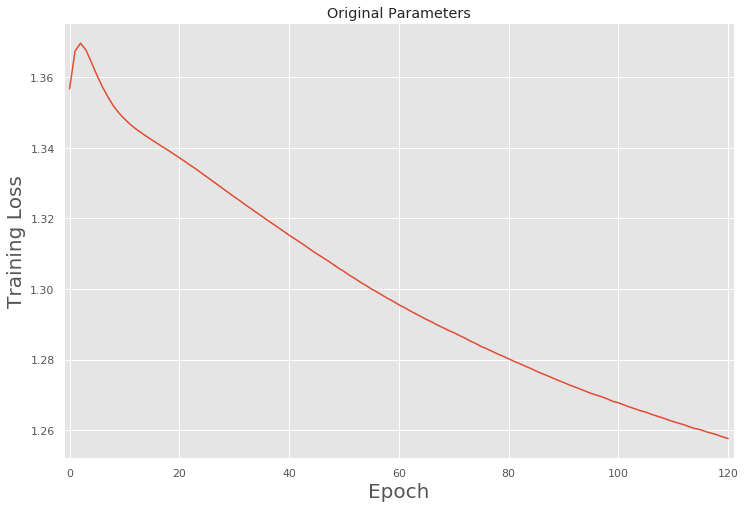

In [ ]:
def NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):

  #Set up the Neural Network
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, num_classes)
      
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out = self.fc3(out)
          return out

  #Call the NN
  net = NeuralNet(input_size, hidden_size, num_classes)

  #Loss function and optimiser

  criterion = nn.CrossEntropyLoss()

  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader, 0):
    
      labels=labels.squeeze()
      
        
    # forward pass
      outputs = net(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()

    # print training statistics
     # if (i+1) % (batch_size-1)==0 and epoch % 5 == 0:
       # print('Epoch [{}/{}] \t Iteration [{}/{}] \t Training Loss: {:.6f}'.format(epoch, num_epochs, i+1, total_step, train_loss / (int(len(X_train_NN))/batch_size)))
        
    loss_values.append(train_loss/total_step)

  
#Evaluate the performance 
  net.eval()

  correct = 0
  total = 0
  for descriptor, labels in test_loader:
    labels = labels.squeeze()
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy on test data: {} %'.format(100 * correct / total))

  return loss_values


# print the loss value


loss=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)

plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss)
plt.title('Original Parameters')




## Task 3.1

Show and document how changing the learning rate to: (i) 0.0005 and (ii) 0.95 leads to poor convergence. Explain and document the reasons for your observations based on the mathematics of the algorithm

Accuracy on test data: 43.24596774193548 %


Text(0.5, 1.0, 'Learning rate = 0.0005')

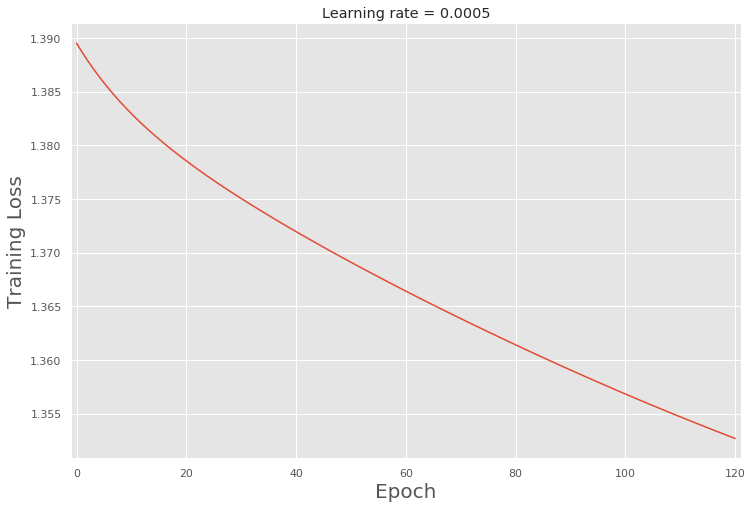

In [ ]:
#Update the learning rate 
learning_rate=0.0005
loss=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)


plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss)
plt.title('Learning rate = {}'.format(learning_rate))

Accuracy on test data: 19.052419354838708 %


Text(0.5, 1.0, 'Learning rate = 0.95')

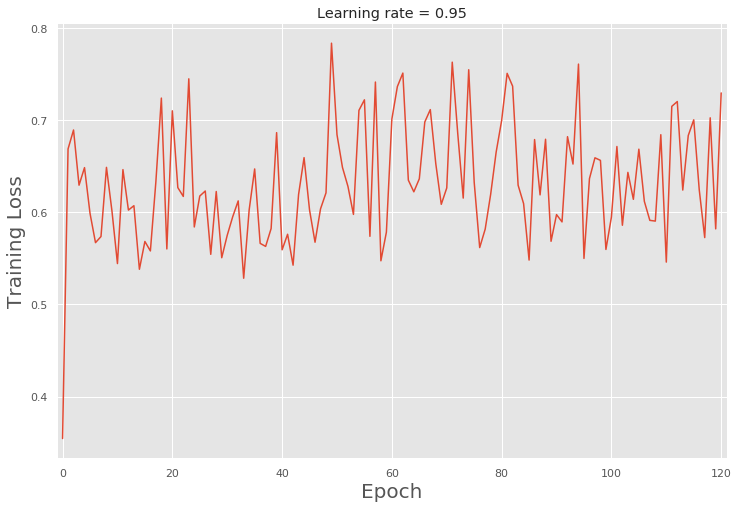

In [ ]:
#Update the learning rate 
learning_rate=0.95


loss=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)





plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss)
plt.title('Learning rate = {}'.format(learning_rate))



---


The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. Setting it too large might reduce the training loss by a lot but it will cause the final result diverge or exceed the optimal value. We can also observe peak unstable value since the step taken is too big. Changing to a learning rate samll will help to get better convergence but too small may cause the descent rate to be too slow and fail to converge to optimal within fixed epochs. As the learning rate increase from 0.0005 to 0.95, we can see at learning rate=0.0005 the value is converging slowly but towards the optimal. At learning rate=0.95, although the training loss is small,the plot just goes way off, it is not going to converge to the optimal value which is poor convergence.


---



## Task 3.2

Show and document how changing the batch size to: (i) 2 and (ii) 256 leads to poor convergence and
performance. Explain and document the reasons

Accuracy on test data: 22.278225806451612 %


Text(0.5, 1.0, 'Batch size = 2')

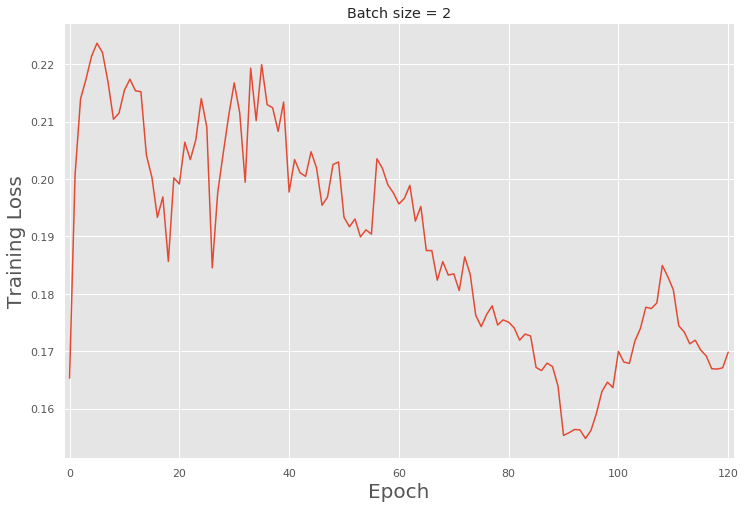

In [ ]:
#Update the batch size

learning_rate=0.01
batch_size=2;

#Reload
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)



loss=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)


plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss)
plt.title('Batch size = {}'.format(batch_size))

Accuracy on test data: 41.935483870967744 %


Text(0.5, 1.0, 'Batch size = 256')

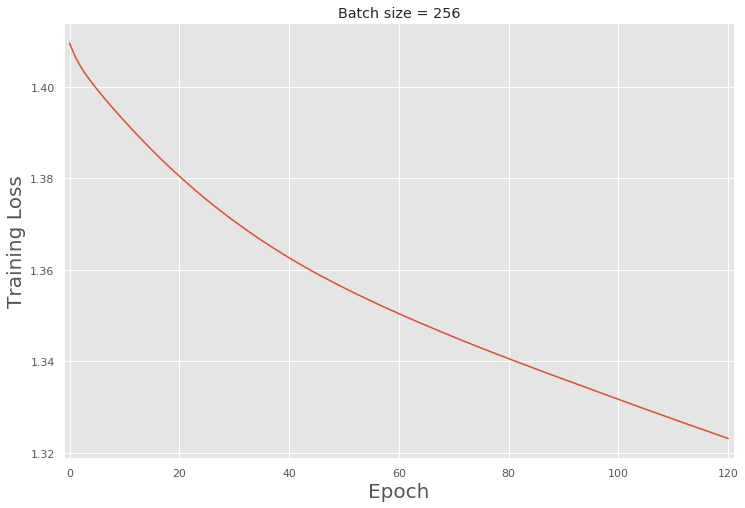

In [ ]:
#Update the batch size

learning_rate=0.01
batch_size=256;


#Reload
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)


loss=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)


plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss)
plt.title('Batch size = {}'.format(batch_size))




---

The choice of batch determines the direction of descent. Smaller batch sizes can lead to noisy estimate of error gradient search. For batch size = 2,training loss is low since it fit the training data set very well Which is likely to overfit the model and get low accuracy testing the test dataset. Since we only used approximatly 4000 traing data set, for batch size = 256 seem still to be a good fit, but the training loss is larger than batch size=64 indicates slow convergence. If we used larger batch size, the estimate experience low noise so the curve is smooth, but we can only be trained less time, the training loss will be larger and the model is likely to underfit, it is not converging fast enough to the optimal which is poor convergence. By choosing right batch-size, memory utilization is improved, the number of iterations required to run an epoch is reduced, and the processing speed for the same amount of data is increased.


---





## Task 3.3

 In Pytorch, implement dropout regularisation to the second layer of the NN, and tune the dropout rate to
optimise the validation of the NN using 5-fold cross-validation.

By using the normal stratified 5-fold, we split the train data to train set and test set, and use them to train,test the model. We keep correct and total = 0 outside the split loop to get the accuracy score for 5 split in total

In [ ]:

from sklearn.model_selection import StratifiedKFold
batch_size=10
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)
cv = StratifiedKFold(n_splits=5, random_state=11)
for dropout_rate in [0.1,0.2,0.5,0.6,0.7,0.8]:
  #Rebuild the model
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, num_classes)
      
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          # Set up agian in each iteration since dropout rate changes
          out = F.dropout(out,p=dropout_rate)
          out = self.fc3(out)
          
          return out
  net_sp = NeuralNet(input_size, hidden_size, num_classes)

    
  correct = 0
  total = 0
  for (train_index,test_index) in cv.split(X_train,Y_train):
    X_train_sp, X_test_sp = X_train.loc[train_index], X_train.loc[test_index]
    Y_train_sp, Y_test_sp = Y_train.loc[train_index], Y_train.loc[test_index]


    # prepare data
    X_train_NN_sp = torch.from_numpy(X_train_sp.values).float()
    Y_train_NN_sp = torch.from_numpy(np.array(Y_train_sp))
    X_test_NN_sp = torch.from_numpy(X_test_sp.values).float()
    Y_test_NN_sp = torch.from_numpy(np.array(Y_test_sp))

  # loading data 
    train_sp = torch.utils.data.TensorDataset(X_train_NN_sp, Y_train_NN_sp)
    train_loader_sp = torch.utils.data.DataLoader(train_sp, batch_size=batch_size)

    test_sp = torch.utils.data.TensorDataset(X_test_NN_sp, Y_test_NN_sp) 
    test_loader_sp = torch.utils.data.DataLoader(test_sp, batch_size=batch_size)

    total_step = len(train_loader)
    loss_values = []

    for epoch in range(num_epochs+1):

    ###################
    # train the model #
    ###################
      net_sp.train()
      train_loss = 0.0
    
      for i, (descriptor, labels) in enumerate(train_loader_sp, 0):
      
        labels=labels.squeeze()
        
        criterion = nn.CrossEntropyLoss()
        optimiser = torch.optim.SGD(net_sp.parameters(), lr=learning_rate)  
          
      # forward pass
        outputs = net_sp(descriptor)
        loss = criterion(outputs, labels)
          
      # backward and optimise
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()

      # update loss
        train_loss += loss.item()

      # print training statistics
        if (i+1) % (batch_size) == 0:
          #print('Epoch [{}/{}] \t Iteration [{}/{}] \t Training Loss: {:.6f}'.format(epoch, num_epochs, i+1, total_step, train_loss / 100))
          train_loss = 0.0
    
      loss_values.append(train_loss / (batch_size))
  
    #Evaluate the performance 
    net_sp.eval()
    for descriptor, labels in test_loader_sp:
      labels = labels.squeeze()
      outputs = net_sp(descriptor)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print('Accuracy on test data with dropout rate= {} : {} %'.format(dropout_rate,100 * correct / total))




Accuracy on test data with dropout rate= 0.1 : 34.15614236509759 %
Accuracy on test data with dropout rate= 0.2 : 34.5292766934558 %
Accuracy on test data with dropout rate= 0.5 : 34.959816303099885 %
Accuracy on test data with dropout rate= 0.6 : 35.7060849598163 %
Accuracy on test data with dropout rate= 0.7 : 35.218140068886335 %
Accuracy on test data with dropout rate= 0.8 : 35.79219288174512 %




---


In Neural network models, if the model has too many parameters or too few training samples, the trained model is prone to overfitting. Over-fitting problems are often encountered when training neural networks with lots of layer. 
Dropout is that we let the activation value of a certain neuron with a certain probability p during the forward conduction, and stop it from working. In our example, the drop out rate does not improve training loss by that much since our model does not face overfitting problem, with smaller batch size the performance increased due to the nature of samll batch size can lead to overfitting problem. Rhe best dropout rate would be 0.8 which result highest performance.



---



# Task 4 Discussion

## Task 4.1 
Compare the performance of the three classifiers you have obtained in Tasks 1, 2 and 3 by applying
them to the test data set. You should report the accuracy, recall, precision, and F1 score and any other
relevant score derived from the confusion matrix. Examine your results in comparison to the performance obtained for the training set. Discuss any other measures or computations that could support your
results.


## Random forest

Confusion matrix on test data for random forest 
 [[ 85  59  66  48]
 [ 53  90  50  48]
 [ 19  15 259   8]
 [ 31  40  37  84]]
accuracy score on test data for random forest 52%
Precision score on test data for random forest 0.5002166160056611
Recall score on test data for random forest 0.49218835437500763
f1 score on test data for random forest 0.4885683195869678
fbeta score on test data for random forest 0.4935816396030282
accuracy score on train data for random forest 52%


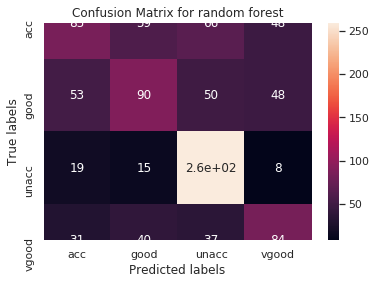

In [ ]:
from sklearn.metrics import confusion_matrix as confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

#Prediction on test data

Y_test_rf_predic=rf_best_model.predict(X_test)



print('Confusion matrix on test data for random forest','\n',confusion_matrix(Y_test_rf_predic,Y_test))
print('accuracy score on test data for random forest',"{:.0%}".format(accuracy_score(Y_test,Y_test_rf_predic)))
print('Precision score on test data for random forest',precision_score(Y_test,Y_test_rf_predic,average='macro'))
print('Recall score on test data for random forest',recall_score(Y_test,Y_test_rf_predic,average='macro'))
print('f1 score on test data for random forest',f1_score(Y_test,Y_test_rf_predic,average='macro'))
print('fbeta score on test data for random forest',fbeta_score(Y_test,Y_test_rf_predic,average='macro',beta=0.5))

Y_train_rf_predic=rf_best_model.predict(X_train)


print('accuracy score on train data for random forest',"{:.0%}".format(accuracy_score(Y_train,Y_train_rf_predic)))




ax=plt.figure()
ax=sns.heatmap(confusion_matrix(Y_test_rf_predic,Y_test), annot=True);

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for random forest'); 
ax.xaxis.set_ticklabels(['acc','good','unacc','vgood']); 
ax.yaxis.set_ticklabels(['acc','good','unacc','vgood']);




## Support Vector Machine

Confusion matrix on test data for svm 
 [[ 74  65  70  54]
 [ 49  73  54  46]
 [ 23  15 247   7]
 [ 42  51  41  81]]
accuracy score on test data for SVM 48%
Precision score on test data for SVM 0.4582080617817551
Recall score on test data for SVM 0.4454564463670203
f1 score on test data for SVM 0.4436430767611821
fbeta score on test data for SVM 0.45018303308073016
accuracy score on train data for SVM 55%


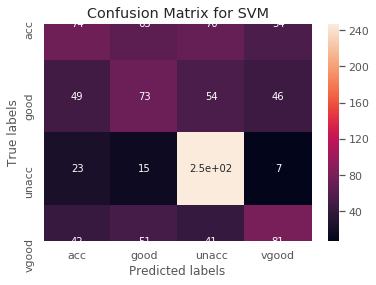

In [ ]:
#Prediction on test data
Y_test_svm_predic=svm_best_model.predict(X_test)

print('Confusion matrix on test data for svm','\n',confusion_matrix(Y_test_svm_predic,Y_test))
print('accuracy score on test data for SVM',"{:.0%}".format(accuracy_score(Y_test,Y_test_svm_predic)))
print('Precision score on test data for SVM',precision_score(Y_test,Y_test_svm_predic,average='macro'))
print('Recall score on test data for SVM',recall_score(Y_test,Y_test_svm_predic,average='macro'))
print('f1 score on test data for SVM',f1_score(Y_test,Y_test_svm_predic,average='macro'))
print('fbeta score on test data for SVM',fbeta_score(Y_test,Y_test_svm_predic,average='macro',beta=0.5))

#Prediction on train data
Y_train_svm_predic=svm_best_model.predict(X_train)


print('accuracy score on train data for SVM',"{:.0%}".format(accuracy_score(Y_train,Y_train_svm_predic)))


ax=plt.figure()
ax=sns.heatmap(confusion_matrix(Y_test_svm_predic,Y_test), annot=True);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for SVM'); 
ax.xaxis.set_ticklabels(['acc','good','unacc','vgood']); 
ax.yaxis.set_ticklabels(['acc','good','unacc','vgood']);



## Neural Net Work

To get the confusion matrix for the Neural Net Work, I saved the rating prediction and true value in each test and train loader, then concate them to an array to compute the scores derived from confusion matrix.

In [ ]:
input_size = 6   #6 features  
hidden_size = 200
num_classes = 4   #4 classes(unacceptable,acceptable,good,very good)
num_epochs = 120
batch_size = 64
learning_rate = 0.01

# prepare data
X_train_NN = torch.from_numpy(X_train.values).float()
Y_train_NN = torch.from_numpy(np.array(Y_train_N))

X_test_NN = torch.from_numpy(X_test.values).float()
Y_test_NN = torch.from_numpy(np.array(Y_test_N))

# loading data 
train = torch.utils.data.TensorDataset(X_train_NN, Y_train_NN)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)

test = torch.utils.data.TensorDataset(X_test_NN, Y_test_NN)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)


In [ ]:
def NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):
  Y_true=[]
  Y_predic=[]
  Y_true_train=[]
  Y_predic_train=[]
  #Set up the Neural Network
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, num_classes)
      
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out = self.fc3(out)
          return out

  #Call the NN
  net = NeuralNet(input_size, hidden_size, num_classes)

  #Loss function and optimiser

  criterion = nn.CrossEntropyLoss()

  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader, 0):
    
      labels=labels.squeeze()
      
        
    # forward pass
      outputs = net(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()
        
    loss_values.append(train_loss/total_step)

  
#Evaluate the performance 
  net.eval()

  correct = 0
  total = 0
  for descriptor, labels in test_loader:
    labels = labels.squeeze()
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #Save the prediction and true rating value
    Y_true.append(labels.numpy())
    Y_predic.append(predicted.numpy())

  correct = 0
  total = 0
  for descriptor, labels in train_loader:
    labels = labels.squeeze()
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    #Save the prediction and true rating value
    Y_true_train.append(labels.numpy())
    Y_predic_train.append(predicted.numpy())

  return loss_values,Y_true,Y_predic,Y_true_train,Y_predic_train

computation time for deep: 9.849770546999999
Confusion matrix on test data for Neural Network 
 [[  7   3   5   2]
 [ 33  63  30  32]
 [ 17  11 217   7]
 [131 127 160 147]]
accuracy score on test data for Neural Network 44%
Precision score on test data for Neural Network 0.4829467463397741
Recall score on test data for Neural Network 0.41366787367704777
f1 score on test data for Neural Network 0.36510292152816204
fbeta score on test data for Neural Network 0.39446065336366876
accuracy score on train data for Neural Network 37%


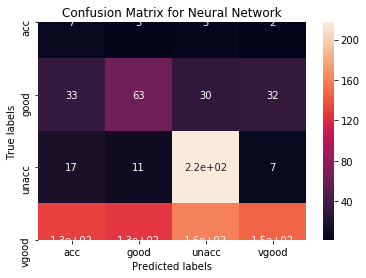

In [ ]:
#Get the prediction rating value during evaluation and correspoind true rating value
start = time.process_time()
[loss,Y_true_NN,Y_predic_NN,Y_true_NN_train,Y_predic_NN_train]=NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate)  
NN_time=time.process_time() - start
print('computation time for deep:',time.process_time() - start)

#Concate the data set
Y_true_NN=np.concatenate(Y_true_NN).ravel()
Y_predic_NN=np.concatenate(Y_predic_NN).ravel()
Y_true_NN_train=np.concatenate(Y_true_NN_train).ravel()
Y_predic_NN_train=np.concatenate(Y_predic_NN_train).ravel()
#Prediction on test data



print('Confusion matrix on test data for Neural Network','\n',confusion_matrix(Y_predic_NN,Y_true_NN))
print('accuracy score on test data for Neural Network',"{:.0%}".format(accuracy_score(Y_true_NN,Y_predic_NN)))
print('Precision score on test data for Neural Network',precision_score(Y_true_NN,Y_predic_NN,average='macro'))
print('Recall score on test data for Neural Network',recall_score(Y_true_NN,Y_predic_NN,average='macro'))
print('f1 score on test data for Neural Network',f1_score(Y_true_NN,Y_predic_NN,average='macro'))
print('fbeta score on test data for Neural Network',fbeta_score(Y_true_NN,Y_predic_NN,average='macro',beta=0.5))


print('accuracy score on train data for Neural Network',"{:.0%}".format(accuracy_score(Y_true_NN_train,Y_predic_NN_train)))




ax=plt.figure()
ax=sns.heatmap(confusion_matrix(Y_predic_NN,Y_true_NN), annot=True);

# labels, title and ticks

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix for Neural Network'); 
ax.xaxis.set_ticklabels(['acc','good','unacc','vgood']); 
ax.yaxis.set_ticklabels(['acc','good','unacc','vgood']);




---


Random forest tend to perform better on testing set rather than the training dataset. SVM and Neural Net work perform better on training set, since we have balanced the data set, the accuracy score can be used to measure. The F-beta score is the weighted harmonic mean of precision and recall,

#4.2

Discuss the suitability of each of the three methods for our task. Comment on their generalisability to
the test data, computational cost, and the appropriateness given the dimensionality of the data and any
other insights based on your study of the descriptors of the data set. You should base your evaluations on
evidence and computations. Which model would you recommend to your manager?

In [ ]:
print('accuracy score on test data for random forest',"{:.0%}".format(accuracy_score(Y_test,Y_test_rf_predic)))
print('accuracy score on test data for SVM',"{:.0%}".format(accuracy_score(Y_test,Y_test_svm_predic)))
print('accuracy score on test data for Neural Network',"{:.0%}".format(accuracy_score(Y_true_NN,Y_predic_NN)))
print('\n')
print('Optimal hyperparameter tuning time for random forest:', rf_time)
print('Optimal hyperparameter tuning time for SVM:', SVM_rbf_time)
print('Training time for Neural Network:', NN_time)

accuracy score on test data for random forest 52%
accuracy score on test data for SVM 48%
accuracy score on test data for Neural Network 44%


Optimal hyperparameter tuning for random forest: 72.82194910400017
Optimal hyperparameter tuning for SVM: 127.6744844110001
Training time for Neural Network: 10.72920850000014




---
As we can see, random forest perform the best in overall performance and gets the highest overall score. 

Random forest training can be highly parallelized and can run effectively on large data sets. The model can still be trained efficiently when the sample feature dimension is high. The generalized ability of the finally trained model is strong. We can find the importance of each feature that has largest impact on prediction by cross validation.

SVM is mainly used in the case of linear inseparability. The classification results are very dependent on the parameters. It basically does not involve the measurement of probability. The final decision function of the SVM is determined only by a small number of support vectors therefore he complexity of the calculation depends on the number of support vectors, not the dimension of the sample space, which avoids curse of dimensionality in a sense. An disadvantage is when we use cross-validation of training data to find suitable parameters and this process is time consuming but finding the optimal hyperparameter is crucial since the system default parameter generally perform worse.

There are some data rated 'Very good' but has similar feature to other ratings and our neural network model is quite sensitive to these data which leads to poor performance. Our data set only has 6 features which means low dimension data, random forest is capable and perform the best on the test data therefore i would recommend random forest to the manager.





.


# Task 5



## 5.1
 (20 marks) Consider the NN model with the same hyperparameters and options that you implemented
in Task 3. Optimise a new NN where the architecture is changed to have 5 hidden layers with 80 neurons each. Compare the performance of this 'deep' network to the 'shallow' network in Task 3 in terms of
performance, training and computational cost. Provide evidence and computations to support and document your analysis. 

In [ ]:
input_size = 6   #6 features  
hidden_size = 80
num_classes = 4   #4 classes(unacceptable,acceptable,good,very good)
num_epochs = 120
batch_size = 64
learning_rate = 0.01

In [ ]:
# prepare data
X_train_NN = torch.from_numpy(X_train.values).float()
Y_train_NN = torch.from_numpy(np.array(Y_train_N))

X_test_NN = torch.from_numpy(X_test.values).float()
Y_test_NN = torch.from_numpy(np.array(Y_test_N))



# loading data 

train = torch.utils.data.TensorDataset(X_train_NN, Y_train_NN)
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size)

test = torch.utils.data.TensorDataset(X_test_NN, Y_test_NN)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size)


In [ ]:
def NNwork(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):
  Y_true=[]
  Y_predic=[]
  #Set up the Neural Network
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, num_classes)
      
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out = self.fc3(out)
          return out

  #Call the NN
  net = NeuralNet(input_size, hidden_size, num_classes)

  #Loss function and optimiser

  criterion = nn.CrossEntropyLoss()

  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader, 0):
    
      labels=labels.squeeze()
      
        
    # forward pass
      outputs = net(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()
        
    loss_values.append(train_loss/total_step)

  
#Evaluate the performance 
  net.eval()

  correct = 0
  total = 0
  for descriptor, labels in test_loader:
    labels = labels.squeeze()
    outputs = net(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy on test data: {} %'.format(100 * correct / total))

  return loss_values

In [ ]:

import time

# Get the process time for 'shallow' neural network
start = time.process_time()
loss=NNwork(input_size,200,num_classes,num_epochs,batch_size,learning_rate)  
print('computation time for shallow NN:',time.process_time() - start)

Accuracy on test data: 44.858870967741936 %
computation time for shallow NN: 10.688605619999635


In [ ]:
def NNwork_deep(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):


  #Set up the Neural Network
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, hidden_size)
          self.fc4 = nn.Linear(hidden_size, hidden_size)
          self.fc5 = nn.Linear(hidden_size, hidden_size)
          self.fc6 = nn.Linear(hidden_size, num_classes)
      
      def forward(self, x):
          out = F.relu(self.fc1(x))
          out = F.relu(self.fc2(out))
          out = F.relu(self.fc3(out))
          out = F.dropout(out,p=0.8)
          out = F.relu(self.fc4(out))
          out = F.relu(self.fc5(out))
          out = self.fc6(out)
          return out

  #Call the NN
  net_deep = NeuralNet(input_size, hidden_size, num_classes)

  #Loss function and optimiser

  criterion = nn.CrossEntropyLoss()

  optimiser = torch.optim.SGD(net_deep.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net_deep.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader, 0):
    
      labels=labels.squeeze()
      
        
    # forward pass
      outputs = net_deep(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()

    
    loss_values.append(train_loss/total_step)

  #Evaluate the performance 
  net_deep.eval()

  correct = 0
  total = 0
  for descriptor, labels in test_loader:
    labels = labels.squeeze()
    outputs = net_deep(descriptor)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
  print('Accuracy on test data: {} %'.format(100 * correct / total))

  return loss_values





In [ ]:
# Get the process time for 'deep' neural network
start = time.process_time()
loss_deep=NNwork_deep(input_size,80,num_classes,num_epochs,batch_size,learning_rate)  
print('computation time for deep NN:',time.process_time() - start)

Accuracy on test data: 36.189516129032256 %
computation time for deep NN: 11.35638072300003


The performance is worsen in 'deep' Neural Network and the computation cost is larger for 'deep' Neural Network, the time used is longer.

## 5.2
Consider the NN model you implemented in Task 3. Optimise a NN with the same architecture and hyperparameters/options as in Task 3 but changing the activation units from ReLU to Sigmoidal.
Compare the performance of the ReLU and sigmoidal NNs and, specifically, their speed of convergence.
Provide evidence and computations to support and document your analysis. 

In [ ]:
def NNwork_sigmoid(input_size,hidden_size,num_classes,num_epochs,batch_size,learning_rate):

  #Set up the Neural Network
  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          self.fc1 = nn.Linear(input_size, hidden_size)
          self.fc2 = nn.Linear(hidden_size, hidden_size)
          self.fc3 = nn.Linear(hidden_size, num_classes)
      
      def forward(self, x):
          out = F.sigmoid(self.fc1(x))
          out = F.sigmoid(self.fc2(out))
          out = self.fc3(out)
          return out

  #Call the NN
  net = NeuralNet(input_size, hidden_size, num_classes)

  #Loss function and optimiser

  criterion = nn.CrossEntropyLoss()

  optimiser = torch.optim.SGD(net.parameters(), lr=learning_rate)  
  total_step = len(train_loader)
  loss_values = []
  for epoch in range(num_epochs+1):

  ###################
  # train the model #
  ###################
    net.train()
    train_loss = 0.0

    for i, (descriptor, labels) in enumerate(train_loader, 0):
    
      labels=labels.squeeze()
      
        
    # forward pass
      outputs = net(descriptor)
      loss = criterion(outputs, labels)
        
    # backward and optimise
      optimiser.zero_grad()
      loss.backward()
      optimiser.step()

    # update loss
      train_loss += loss.item()
        
    loss_values.append(train_loss/total_step)

  

  return loss_values

Accuracy on test data: 18.951612903225808 %


Text(0.5, 1.0, 'Original Parameters')

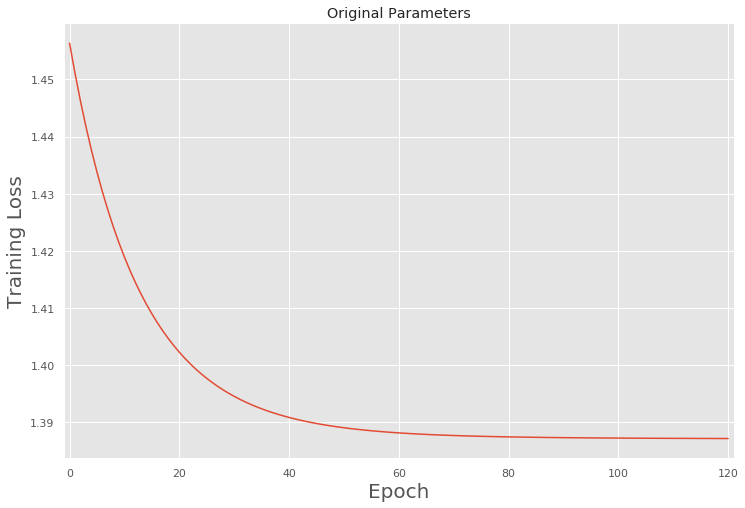

In [ ]:
import time

learning_rate=0.00005
batch_size=64
# Get the process time for 'shallow' neural network
start = time.process_time()
loss=NNwork_sigmoid(input_size,200,num_classes,num_epochs,batch_size,learning_rate)  

#Plot the training loss

plt.style.use('ggplot')
plt.figure(figsize=(12,8))
plt.xlim(-1, num_epochs+1)
plt.ylabel('Training Loss', fontsize=20)
plt.xlabel('Epoch', fontsize=20)
plt.plot(loss)
plt.title('Original Parameters')

As we choose a small learning rate=0.00005, generaly means slow convergence rate but for sigmoid activation function it still coverges quickly, which indicates that Sigmoid NN converges faster than ReLu NN.